# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
# Read your api key environment variable
load_dotenv()

True

In [4]:
# Import news API client
from newsapi.newsapi_client import NewsApiClient
# Create a newsapi client
newsapi=NewsApiClient(api_key=os.environ["NEWS_API_KEY"])

In [5]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(q="bitcoin", 
                                           language="en",
                                           page_size=100,
                                           sort_by="relevancy")

In [6]:
bitcoin_headlines['totalResults']

4547

In [7]:
# Get all articles related to bitcoin
# bitcoin_headlines["articles"] - list of dict structure
# Get first article related to bitcoin 
bitcoin_headlines["articles"][0] #dict of dict structure

{'source': {'id': 'wired', 'name': 'Wired'},
 'author': 'Timothy B. Lee, Ars Technica',
 'title': 'An Engineer Gets 9 Years for Stealing $10M From Microsoft',
 'description': 'The defendant tried—and failed—to use bitcoin to cover his tracks.',
 'url': 'https://www.wired.com/story/an-engineer-gets-9-years-for-stealing-dollar10m-from-microsoft/',
 'urlToImage': 'https://media.wired.com/photos/5fac6afb446b4639b3d5b8d8/191:100/w_1280,c_limit/Security-Microsoft-1229426260.jpg',
 'publishedAt': '2020-11-12T14:00:00Z',
 'content': "A former Microsoft software engineer from Ukraine has been sentenced to nine years in prison for stealing more than $10 million in store credit from Microsoft's online store. From 2016 to 2018, Volod… [+3307 chars]"}

In [8]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(q="ethereum", 
                                            language="en",
                                           page_size=100,
                                           sort_by="relevancy")

In [9]:
ethereum_headlines['totalResults']

1255

In [10]:
# Published Time reformat 
ethereum_headlines["articles"][0]["publishedAt"].replace('T','-')[:-4]

'2020-11-12-21:05'

In [11]:
# Create the function that includes the news information, calculates the sentiment score and compiles information to a dataframe
def create_acticle_df(headlines):
    article_sentiment=[]
    for article in headlines["articles"]:
        try:
            
            # get info from the news
            date =article["publishedAt"].replace('T','-')[:-4]        
            title =article["title"]
            text =article["content"]        
            description =article["description"]
            
            # calculate sentiment score for each content
            sentiment = analyzer.polarity_scores(text)
            compound = sentiment["compound"]
            positive = sentiment["pos"]
            neutral = sentiment["neu"]
            negative = sentiment["neg"]
            
            # append everything back to a list 
            article_sentiment.append({
                "Date":date,
                "Title":title,
                "Text":text,
                "Description":description,
                "Compound": compound,
                "Positive" :positive,
                "Neutral"  :neutral,
                "Negative":negative
                
            })
        except AttributeError:
            pass
    return pd.DataFrame(article_sentiment)
    

In [12]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_df = create_acticle_df(bitcoin_headlines)
bitcoin_df[["Compound","Positive","Neutral","Negative"]]

,Compound,Positive,Neutral,Negative
0,-0.6705,0.064,0.737,0.199
1,0.6369,0.162,0.838,0.000
2,0.2144,0.053,0.947,0.000
3,0.2023,0.050,0.950,0.000
4,0.0000,0.000,1.000,0.000
...,...,...,...,...
93,-0.0516,0.036,0.923,0.041
94,0.5859,0.146,0.854,0.000
95,0.2023,0.056,0.909,0.035
96,0.8779,0.318,0.682,0.000


In [13]:
# Create the Ethereum sentiment scores DataFrame
ethereum_df=create_acticle_df(ethereum_headlines)
ethereum_df[["Compound","Positive","Neutral","Negative"]]

,Compound,Positive,Neutral,Negative
0,0.2144,0.053,0.947,0.0
1,0.0000,0.000,1.000,0.0
2,0.4215,0.088,0.912,0.0
3,0.0000,0.000,1.000,0.0
4,0.1779,0.052,0.948,0.0
...,...,...,...,...
91,0.0000,0.000,1.000,0.0
92,0.2500,0.103,0.897,0.0
93,0.0000,0.000,1.000,0.0
94,0.3612,0.075,0.925,0.0


In [14]:
# Describe the Bitcoin Sentiment
bitcoin_df[["Compound","Positive","Neutral","Negative"]].describe()

,Compound,Positive,Neutral,Negative
count,98.000000,98.000000,98.000000,98.000000
mean,0.157352,0.057449,0.922122,0.020429
std,0.340462,0.066147,0.082311,0.052755
min,-0.946800,0.000000,0.637000,0.000000
25%,0.000000,0.000000,0.858500,0.000000
50%,0.000000,0.050000,0.947500,0.000000
75%,0.435675,0.120000,1.000000,0.000000
max,0.877900,0.318000,1.000000,0.363000


In [15]:
# Describe the Ethereum Sentiment
ethereum_df[["Compound","Positive","Neutral","Negative"]].describe()

,Compound,Positive,Neutral,Negative
count,96.000000,96.000000,96.000000,96.000000
mean,0.226694,0.076500,0.902302,0.021208
std,0.364048,0.078988,0.088379,0.045445
min,-0.670500,0.000000,0.653000,0.000000
25%,0.000000,0.000000,0.849750,0.000000
50%,0.220350,0.074000,0.912000,0.000000
75%,0.498075,0.125500,1.000000,0.000000
max,0.883400,0.347000,1.000000,0.196000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum had the highest mean positive score of 0.076500 , while bitcoin had mean positive score of 0.057449.

Q: Which coin had the highest compound score?

A: Ethereum had the highest compound score in terms of mean and max.  Ethereum's mean compounded score was 0.226694 while Bitcoin's mean compounded score was 0.157352. Also, Ethereum max compounded score was 0.883400 while Bitcoin's max compounded score was 0.877900.

Q. Which coin had the highest positive score?

A: Ethereum.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [16]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [17]:
text = bitcoin_headlines["articles"][0] ["content"]

In [18]:
# Complete the tokenizer function
def tokenizer(article):
    """Tokenizes text."""
    
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    # Expand the default stopwords list if necessary
    sw_addons = {'said', 'sent', 'found', 'including', 'today', 'announced', 'week', 'basically', 'also', 'chars'}
    
    # Remove the punctuation
    re_clean = regex.sub('', article)
    
    # Create a list of the words
    words = word_tokenize(re_clean)
    
    # Remove the stop words & Convert the words to lowercase
    output = [word.lower() for word in words if word.lower() not in sw.union(sw_addons)]
    
    # Lemmatize Words into root words
    # Instantiate the lemmatizer
    lemmatizer = WordNetLemmatizer() 
    tokens= [lemmatizer.lemmatize(word) for word in output]
    return tokens

In [19]:
# Create a new tokens column for Bitcoin
bitcoin_df["Token"]=[tokenizer(article) for article in bitcoin_df.Text]
bitcoin_df.tail()

,Date,Title,Text,Description,Compound,Positive,Neutral,Negative,Token
93,2020-11-20-07:01,Increase in Bitcoin Addresses as More People J...,Its been nearly three years since the Bitcoin ...,"As Bitcoin nears $20k, we see a surge in Bitco...",-0.0516,0.036,0.923,0.041,"[nearly, three, year, since, bitcoin, price, r..."
94,2020-12-03-14:01,"Facebook's Diem, Visa, and PayPal are looking ...","Visa, PayPal, and Diem, formerly known as Libr...","Summary List PlacementVisa, PayPal, and Diem, ...",0.5859,0.146,0.854,0.000,"[visa, paypal, diem, formerly, known, libra, l..."
95,2020-11-18-12:00,Hacking the FPGA Control Board from a Bitcoin ...,For anyone serious about mining cryptocurrency...,For anyone serious about mining cryptocurrency...,0.2023,0.056,0.909,0.035,"[anyone, serious, mining, cryptocurrency, bitc..."
96,2020-11-19-14:38,PayPal's version of GoFundMe is called Generos...,"PayPal has launched the Generosity Network, a ...","PayPal has launched the Generosity Network, a ...",0.8779,0.318,0.682,0.000,"[paypal, launched, generosity, network, platfo..."
97,2020-11-18-20:22,"The price of the bictóin reaches 18,000 dollars","November\r\n18, 2020\r\n2 min read\r\nThis art...",The price of the most famous virtual currency ...,-0.3400,0.000,0.936,0.064,"[november, min, readthis, article, translated,..."


In [20]:
# Create a new tokens column for Ethereum
ethereum_df["Token"]=[tokenizer(article) for article in ethereum_df.Text]
ethereum_df.tail()

,Date,Title,Text,Description,Compound,Positive,Neutral,Negative,Token
91,2020-11-10-16:00,Kadena Partners With Stablecoin-Maker Terra in...,Hybrid blockchain platform Kadena is teaming u...,"The hybrid blockchain maker, Kadena, announced...",0.0000,0.000,1.000,0.0,"[hybrid, blockchain, platform, kadena, teaming..."
92,2020-12-07-17:19,"Blockchain Bites: $187M Blockchain Bond, $522M...",Singapore is funding blockchain R&amp;D. Germa...,Singapore is funding blockchain R&D. Germany's...,0.2500,0.103,0.897,0.0,"[singapore, funding, blockchain, rampd, german..."
93,2020-11-24-13:00,CoinDesk Is Spinning Up an Ethereum 2.0 Node. ...,CoinDesk just snagged a front-row seat to a se...,CoinDesk just snagged a front-row seat to a se...,0.0000,0.000,1.000,0.0,"[coindesk, snagged, frontrow, seat, seminal, e..."
94,2020-11-22-19:42,NFT Painting of Buterin in Harlequin Garb Sets...,"Ethereum co-founder Vitalik Buterin, dressed l...","""EthBoy,"" created by Trevor Jones and Alotta M...",0.3612,0.075,0.925,0.0,"[ethereum, cofounder, vitalik, buterin, dresse..."
95,2020-11-19-04:55,Five Best Smart Contract Platforms,FIVE BEST SMART CONTRACT PLATFORMS HYPERLEDGER...,As there are several blockchains that offer th...,0.8769,0.279,0.721,0.0,"[five, best, smart, contract, platform, hyperl..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [21]:
from collections import Counter
from nltk import ngrams

In [22]:
# Generate the Bitcoin N-grams where N=2
def n_gram_calculator(dataframe):
    # Create an empty list to store appended results
    initial_word_list = []
    
    # Loop through each rows in dataframe
    for rows in range(len(dataframe.index)):
        # Add the list of word to initial_word_list, return one list of all articles
        initial_word_list += dataframe.loc[rows,'Token']
        
    # Generate N-grams where N=2
    total_count = Counter(ngrams(initial_word_list, n=2))
    return dict(total_count)


In [23]:
# Generate the Ethereum N-grams where N=2
bitcoin_n_gram= n_gram_calculator(bitcoin_df) 
ethereum_n_gram= n_gram_calculator(ethereum_df) 

In [24]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [25]:
def list_generator(dataframe):
    # Create an empty list to store appended results
    initial_word_list = []
    
    # Loop through each rows in dataframe
    for rows in range(len(dataframe.index)):
        # Add the list of word to initial_word_list, return one list of all articles
        initial_word_list += dataframe.loc[rows,'Token']
    return initial_word_list

In [26]:
# Get the top 10 words for Bitcoin
Bitcoin_word_list = list_generator(bitcoin_df)
token_count(Bitcoin_word_list, N=10)

[('bitcoin', 84),
 ('reuters', 69),
 ('currency', 39),
 ('virtual', 33),
 ('taken', 31),
 ('photo', 30),
 ('illustration', 27),
 ('reutersdado', 27),
 ('representation', 26),
 ('seen', 25)]

In [27]:
# Get the top 10 words for Bitcoin N-gram = 2
token_count(bitcoin_n_gram, N=10)

[(('virtual', 'currency'), 31),
 (('reuters', 'bitcoin'), 26),
 (('representation', 'virtual'), 23),
 (('currency', 'bitcoin'), 23),
 (('illustration', 'taken'), 23),
 (('photo', 'representation'), 20),
 (('bitcoin', 'seen'), 19),
 (('reuters', 'stafffile'), 13),
 (('stafffile', 'photo'), 13),
 (('taken', 'november'), 12)]

In [28]:
# Get the top 10 words for Ethereum
Ethereum_word_list=list_generator(ethereum_df)
token_count(Ethereum_word_list, N=10)

[('ethereum', 50),
 ('bitcoin', 41),
 ('reuters', 21),
 ('blockchain', 18),
 ('cryptocurrency', 17),
 ('currency', 13),
 ('asset', 13),
 ('price', 13),
 ('new', 12),
 ('first', 11)]

In [29]:
# Get the top 10 words for Ethereum N-gram = 2
token_count(ethereum_n_gram, N=10)

[(('virtual', 'currency'), 10),
 (('photo', 'representation'), 8),
 (('york', 'reuters'), 7),
 (('representation', 'virtual'), 7),
 (('currency', 'bitcoin'), 7),
 (('illustration', 'taken'), 7),
 (('reuters', 'bitcoin'), 7),
 (('bitcoin', 'seen'), 6),
 (('bitcoin', 'ethereum'), 6),
 (('ethereum', 'blockchain'), 6)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [31]:
# Create a funtion for word cloud
def create_word_cloud(wordlist):
    word_string = ' '.join(wordlist)
    wc = WordCloud().generate(word_string)
    return plt.imshow(wc)


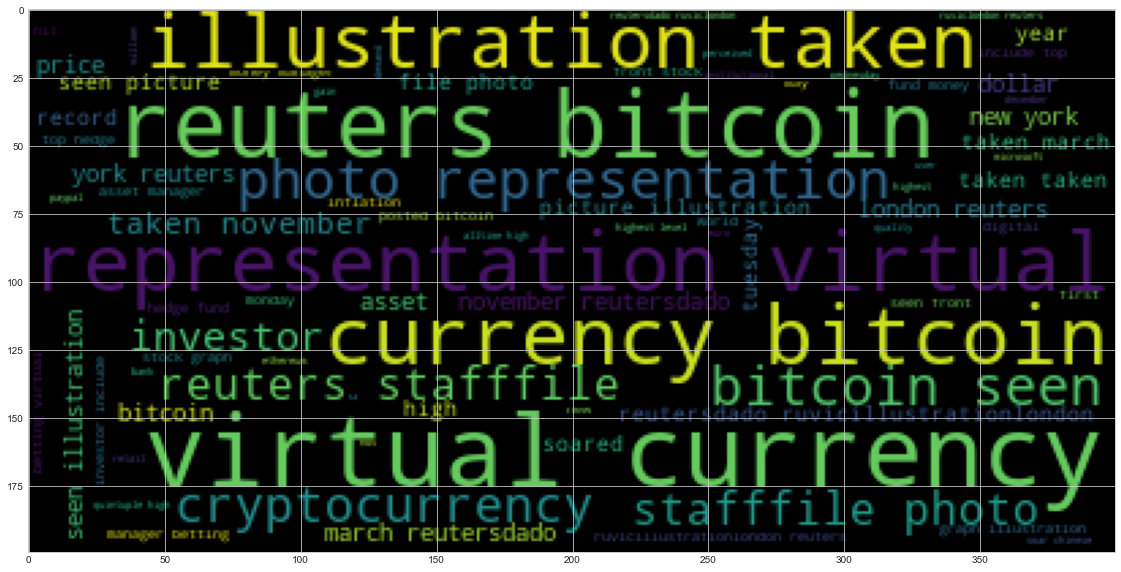

In [32]:
# Generate the Bitcoin word cloud
create_word_cloud(Bitcoin_word_list)

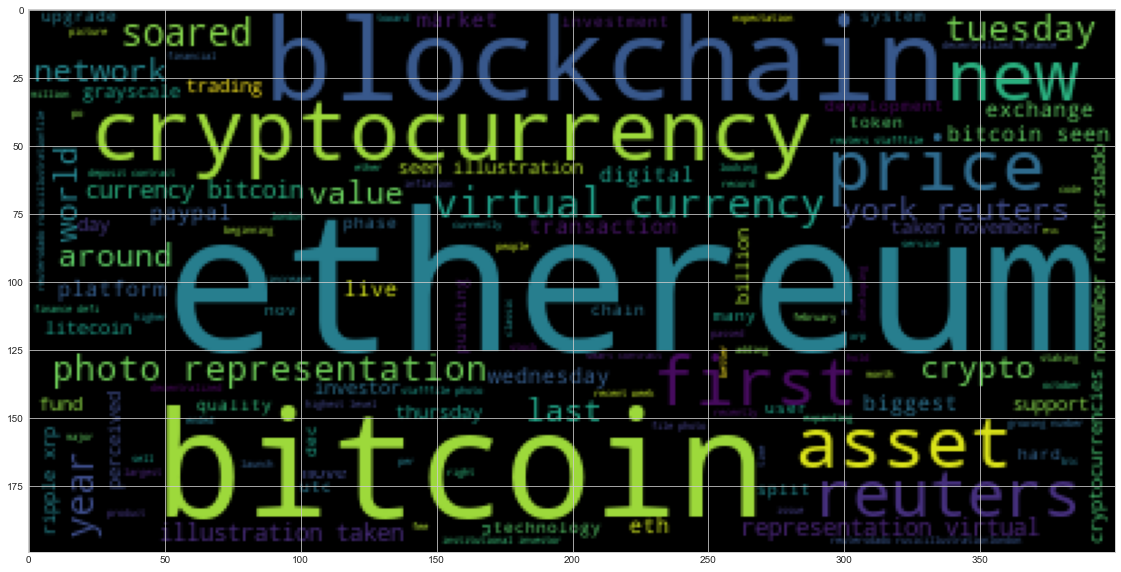

In [33]:
# Generate the Ethereum word cloud
create_word_cloud(Ethereum_word_list)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [34]:
import spacy
from spacy import displacy

In [35]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [36]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [37]:
# Concatenate all of the Bitcoin text together
bitcoin_concentrate= ' '.join(Bitcoin_word_list)
bitcoin_concentrate

'former microsoft software engineer ukraine sentenced nine year prison stealing million store credit microsofts online store volod visahas partnered cryptocurrency startup blockfi offer first reward credit card pay bitcoin rather cash worth applying unless youre extremely bullish paypal bringing newlyannounced support cryptocurrency u account first plan open cryptocurrency trading usbased user october november absolutely massive twomonth rally bitcoin passed first time next day soared even higher reaching price roug unlike conventional cryptocurrencies central bank control digital yuan case people bank china move give country power theory stability freq youve watching crypto market past week youll noticed something special bitcoin everyones favorite decentralized digital currency based hype lie general mal decentralized exchange protocol allow crypto trader investor trade across different blockhains development significant new development come la u market ended november large gain even

In [38]:
# Run the NER processor on all of the text
doc = nlp(bitcoin_concentrate)
# Add a title to the document
doc.user_data["title"]= "Bitcoin NER"

In [39]:
# Render the visualization
displacy.render(doc, style='ent')

In [40]:
# Create a function that lists all Entities
def entity_list(doc):
    unique_entity =[]
    for ent in doc.ents:
        if (ent.text, ent.label_) not in unique_entity:
            unique_entity.append((ent.text, ent.label_))
    
    for items in unique_entity:
        return unique_entity

In [41]:
entity_list(nlp(bitcoin_concentrate))

[('microsoft', 'ORG'),
 ('ukraine', 'GPE'),
 ('nine year', 'DATE'),
 ('million', 'CARDINAL'),
 ('first', 'ORDINAL'),
 ('bitcoin', 'GPE'),
 ('october', 'DATE'),
 ('november', 'DATE'),
 ('next day', 'DATE'),
 ('central bank', 'ORG'),
 ('digital yuan', 'ORG'),
 ('past week', 'DATE'),
 ('hype lie general mal decentralized exchange', 'ORG'),
 ('crypto', 'ORG'),
 ('monthly', 'DATE'),
 ('april fourthbest month', 'DATE'),
 ('williams', 'PERSON'),
 ('arya stark', 'PERSON'),
 ('lady catelyn lord', 'PERSON'),
 ('eddard acolyte', 'PERSON'),
 ('monday', 'DATE'),
 ('tuesday evening', 'TIME'),
 ('december', 'DATE'),
 ('chavez justin', 'PERSON'),
 ('bbc newsimage', 'PERSON'),
 ('highthe digital cur posted bitcoin grabbed', 'ORG'),
 ('reuters', 'ORG'),
 ('reutersdado ruvicillustrationtokyo', 'ORG'),
 ('reuters bitcoin', 'ORG'),
 ('reutersdado ruvicillustrationlondon', 'PERSON'),
 ('london', 'GPE'),
 ('february', 'DATE'),
 ('reutersdado ruvicillustrationlondon reuters', 'ORG'),
 ('reutersdado ruvicillus

---

### Ethereum NER

In [42]:
# Concatenate all of the Ethereum text together
ethereum_concentrate= ' '.join(Ethereum_word_list)
#ethereum_concentrate

In [43]:
# Run the NER processor on all of the text
doc = nlp(ethereum_concentrate)
# Add a title to the document
doc.user_data["title"]= "Ethereum NER"

In [44]:
# Render the visualization
displacy.render(doc, style='ent')

In [45]:
# List all Entities
entity_list(nlp(ethereum_concentrate))

[('october', 'DATE'),
 ('february', 'DATE'),
 ('reutersdado ruvicillustrationlondon', 'ORG'),
 ('london', 'GPE'),
 ('monday', 'DATE'),
 ('reutersdado ruvicillustrationlondon reuters', 'PERSON'),
 ('new york', 'GPE'),
 ('million', 'CARDINAL'),
 ('second', 'ORDINAL'),
 ('new york reuters institutional', 'ORG'),
 ('november', 'DATE'),
 ('reuters', 'ORG'),
 ('un decentralized exchange', 'ORG'),
 ('early february year', 'DATE'),
 ('one', 'CARDINAL'),
 ('last month', 'DATE'),
 ('min', 'ORG'),
 ('reutersdado ruvicillustrationnew york', 'ORG'),
 ('reutersdado ruvicillustrationlondon', 'PERSON'),
 ('bitcoin hala', 'GPE'),
 ('hedera', 'PERSON'),
 ('syrian', 'NORP'),
 ('bitcoin', 'GPE'),
 ('tech center', 'FAC'),
 ('sunnyvale', 'GPE'),
 ('california', 'GPE'),
 ('reutersstephen lamullibitcoin', 'PERSON'),
 ('metamaskio wallet wallet', 'FAC'),
 ('browse london reuters', 'ORG'),
 ('tuesday', 'DATE'),
 ('year', 'DATE'),
 ('london reuters bitcoin', 'ORG'),
 ('chavez', 'PERSON'),
 ('december', 'DATE'),


---